# Exploratory Data Analysis

## Goals
Our goal for today is to learn to use pandas to load a dataset, perform a basic analysis, and answer some questions that we may have about that data.

## Introduction

The first steps before performing an analysis in a dataset, is to simply "explore" it. This is called **Exploratory Data Analysis**, or EDA, for short. The term was coined by [John Tukey](https://en.wikipedia.org/wiki/John_Tukey). (Sidenote: among other things, he also co-invented the Fast Fourier Transform.) If you are interested to learn more about EDA, then you can read this short encyclopedia [article](https://www.stat.berkeley.edu/~brill/Papers/EDASage.pdf) or the "[Art of Data Science](http://bedford-computing.co.uk/learning/wp-content/uploads/2016/09/artofdatascience.pdf)" handbook.

### Goals of Exploratory Data Analysis

1. To determine if there are any problems with your dataset.
2. To determine whether the question you are asking can be answered by the data that you have.
3. To develop a sketch of the answer to your question.

### Exploratory Data Analysis checklist

1. Formulate your question
2. Read in your data
3. "Check the packaging" (rows, columns, types, etc.)
4. Look at the top and the bottom of your data 
5. Check your “n”s (do you see the expected number of rows, columns?)
6. Validate with at least one external data source 
7. Make a plot
8. Try the easy solution first
9. Follow up (do you have the right data? do you need other data? do you have the right question?)

For this exercise we will download the MovieLens dataset. It has been used many times as a testbed for recommendation algorithms, i.e. to predict which movies the user may be interested in watching, similar to what Netflix does. There are various versions of the dataset. We will use the "Movielens 20 Million", which contains approximately 20Million ratings of movies that users watched.

## Questions
These are the questions that we are interested in answering:

1. How many movies?
2. How many users?
3. How many ratings?
4. What is the distribution of ratings?
5. What is the average rating across all users?
6. What is the average rating across *per user*?
7. Which are the most-watched movies?
8. Which are the most-watched movies in the state of California and New York?
9. In which state do they watch mostly comedies?
10. In which state do they watch mostly thrillers?
11. In which city is the user with the most consistent rating bahavior?
12. In which city is the user with the most erratic rating behavior?
11. Find groups of users that have watched at least 20 similar movies.
12. If someone has watched "The Matrix" which other movie would you recommend?

**[Michalis to ahmad: Do as many as you can of those.]**

## Downloading the necessary file(s)
You may download MovieLens from [here](https://grouplens.org/datasets/movielens/20m/), or it's always better if we do it programmatically! So, we would have to install the ```wget``` library for Python.

In [1]:
!pip install wget

In [2]:
import wget
url = "http://files.grouplens.org/datasets/movielens/ml-20m.zip"
wget.download(url) # this will take at least a minute, so drink some water, coffee,...

'ml-20m (1).zip'

Now we have a file called ```ml-20m.zip```. You can unzip it as follows, which will create a directory with the same name.

In [ ]:
!unzip ml-20m.zip

Archive:  ml-20m.zip
replace ml-20m/genome-scores.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import data

In [4]:
%cd "./ml-20m"

[Errno 2] No such file or directory: './ml-20m'
/Users/mvlachos/PycharmProjects/week1/ml-20m


In [12]:
# movies data
column_names_movies = ['movie_id', 'title', 'genres']
movies = pd.read_csv('movies.csv', delimiter = ',', names = column_names_movies,
                     header = 0)
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
# summary of the movies Dataframe
movies.info()

print('')

# summary of the ratings Dataframe
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
movie_id    27278 non-null int64
title       27278 non-null object
genres      27278 non-null object
dtypes: int64(1), object(2)
memory usage: 639.4+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000263 entries, 0 to 20000262
Data columns (total 4 columns):
user_id      int64
movie_id     int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 610.4 MB


In [7]:
# ratings data
column_names_ratings = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ratings.csv', delimiter = ',', names= column_names_ratings
                      , header = 0)
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [8]:
# check NaN values
print ("Number of movies Null values: ", movies.isnull().sum())
print ("Number of ratings Null values: ", ratings.isnull().sum())

Number of movies Null values:  movie_id    0
title       0
genres      0
dtype: int64
Number of ratings Null values:  user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64


In [9]:
# drop Null values
movies.dropna(inplace=True)

# and check again for Nan values
print ("Number of movies Null values: ", movies.isnull().sum())

Number of movies Null values:  movie_id    0
title       0
genres      0
dtype: int64


In [8]:
# users data
column_names_users = ['user_id', 'gender', 'age', 'occupation', 'zipcode']
users = pd.read_csv('user.csv', delimiter = ';', names= column_names_users
                    , header = 0)
users.head(5)

,user_id,gender,age,occupation,zipcode
0,1,F,Under18,K-12student,48067
1,2,M,56+,self-employed,70072
2,3,M,25-34,scientist,55117
3,4,M,45-49,executive/managerial,2460
4,5,M,25-34,writer,55455


In [9]:
# summary of the users Dataframe
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null object
occupation    6040 non-null object
zipcode       6040 non-null object
dtypes: int64(1), object(4)
memory usage: 236.0+ KB


In [10]:
# split title and release year in separate columns
movies['year'] = movies.title.str.extract("\((\d{4})\)", expand=True)
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [11]:
# check for NaN values
print ("Number of movies Null values: ", movies.isnull().sum())

# and drop them
movies.dropna(inplace=True)

# verify they dropped
print ("Number of movies Null values: ", movies.isnull().sum())

Number of movies Null values:  movie_id     0
title        0
genres       0
year        22
dtype: int64
Number of movies Null values:  movie_id    0
title       0
genres      0
year        0
dtype: int64


In [12]:
# convert year column to integer 
year_asint = movies['year'].astype(int)

In [13]:
# add the int(year) column  
movies.drop(['year'], inplace = True, axis = 1)
movies['year'] = year_asint
movies.head()

,movie_id,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [14]:
# convert timestamp to date
date = pd.to_datetime(ratings['timestamp']).astype(str)

# add column date to ratings
ratings['date'] = date
ratings.head()

,user_id,movie_id,rating,timestamp,date
0,1,2,3.5,2005-04-02 23:53:47,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40,2005-04-02 23:29:40


In [15]:
# remove the time from the date
ratings['date'] = [time[:10] for time in ratings['date']]
ratings.drop(['timestamp'], inplace = True, axis = 1)
ratings.head()

,user_id,movie_id,rating,date
0,1,2,3.5,2005-04-02
1,1,29,3.5,2005-04-02
2,1,32,3.5,2005-04-02
3,1,47,3.5,2005-04-02
4,1,50,3.5,2005-04-02


In [16]:
#  descriptive statistics of movies Dataframe
movies.describe()

,movie_id,year
count,27256.000000,27256.000000
mean,59811.215806,1989.371551
std,44415.893746,23.335631
min,1.000000,1891.000000
25%,6925.750000,1976.000000
50%,67953.000000,1998.000000
75%,100255.500000,2008.000000
max,131262.000000,2015.000000


In [17]:
#  descriptive statistics of ratings Dataframe
ratings.describe()

,user_id,movie_id,rating
count,2.000026e+07,2.000026e+07,2.000026e+07
mean,6.904587e+04,9.041567e+03,3.525529e+00
std,4.003863e+04,1.978948e+04,1.051989e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,3.439500e+04,9.020000e+02,3.000000e+00
50%,6.914100e+04,2.167000e+03,3.500000e+00
75%,1.036370e+05,4.770000e+03,4.000000e+00
max,1.384930e+05,1.312620e+05,5.000000e+00


### Merge the two Dataframes 

In [18]:
df = pd.merge(movies,ratings,on='movie_id')
df.head()

,movie_id,title,genres,year,user_id,rating,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3,4.0,1999-12-11
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,6,5.0,1997-03-13
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,8,4.0,1996-06-05
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,10,4.0,1999-11-25
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,11,4.5,2009-01-02


In [19]:
# summary of the df Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19999858 entries, 0 to 19999857
Data columns (total 7 columns):
movie_id    int64
title       object
genres      object
year        int32
user_id     int64
rating      float64
date        object
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 1.1+ GB


### Run some ad-hoc queries

In [20]:
# number of ratings with values equals or greater than 4.5
df[df['rating'] >= 4.5]['movie_id'].count()

4433302

In [21]:
# ration of the movies with values equals or greater than 4.5 
df[df['rating'] >= 4.5]['movie_id'].count() / ratings['rating'].count()

0.22166218514226538

In [22]:
# number of ratings with values equals 5.0
df[df['rating'] == 5]['movie_id'].count()

2898551

In [23]:
# ration of the movies with values equals or greater than 5.0
df[df['rating'] == 5]['movie_id'].count() / ratings['rating'].count()

0.1449256442277784

In [24]:
# The most rated movies
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 67310
Forrest Gump (1994)                 66172
Shawshank Redemption, The (1994)    63366
Silence of the Lambs, The (1991)    63299
Jurassic Park (1993)                59715
Name: rating, dtype: int64

In [25]:
# create Dataframe: ratings count per movie
df_ratingCount = pd.DataFrame(df.groupby('title', as_index = False)['rating'].count()
                              .rename(columns={'rating' : 'ratingCount'}))
df_ratingCount.sort_values('ratingCount',ascending=False).head(5)

,title,ratingCount
18808,Pulp Fiction (1994),67310
8708,Forrest Gump (1994),66172
20763,"Shawshank Redemption, The (1994)",63366
20978,"Silence of the Lambs, The (1991)",63299
12636,Jurassic Park (1993),59715


In [26]:
# create Dataframe: mean rating per movie
df_ratingMean = pd.DataFrame(df.groupby('title', as_index = False)['rating'].mean()
                              .rename(columns={'rating' : 'ratingMean'}))
df_ratingMean.sort_values('ratingMean',ascending=False).head(5)

,title,ratingMean
13297,"Lady of Chance, A (1928)",5.0
23601,The Wrecking Crew (2008),5.0
13937,Linotype: The Film (2012),5.0
6849,Donos de Portugal (2012),5.0
19373,Rent-a-Cat (2012),5.0


In [27]:
# create Dataframe: ratings count and mean rating per movie
df_movies_ext = pd.merge(df_ratingCount,df_ratingMean, on='title')
df_movies_ext.sort_values('ratingCount',ascending=False).head(5)

,title,ratingCount,ratingMean
18808,Pulp Fiction (1994),67310,4.174231
8708,Forrest Gump (1994),66172,4.029000
20763,"Shawshank Redemption, The (1994)",63366,4.446990
20978,"Silence of the Lambs, The (1991)",63299,4.177057
12636,Jurassic Park (1993),59715,3.664741


In [28]:
# create Dataframe: ratings count per value
df_rating_dist= pd.DataFrame(ratings.groupby('rating', as_index = False)['user_id'].count()
                         .rename(columns={'user_id' : 'ratingCount'}))
df_rating_dist.head(10)

,rating,ratingCount
0,0.5,239125
1,1.0,680732
2,1.5,279252
3,2.0,1430997
4,2.5,883398
5,3.0,4291193
6,3.5,2200156
7,4.0,5561926
8,4.5,1534824
9,5.0,2898660


In [29]:
# the users with most ratings
ratings_per_user = ratings[['user_id', 'movie_id']].groupby('user_id').count()
ratings_per_user = ratings_per_user.rename(columns={'movie_id' : 'Total'})
ratings_per_user.sort_values('Total',ascending=False).head()

,Total
user_id,
118205,9254
8405,7515
82418,5646
121535,5520
125794,5491


In [30]:
# users per gender 
users_by_gender = users.groupby('gender', as_index = False)['user_id'].count()
users_by_gender.rename(columns={'user_id' : 'Total'}).head()

,gender,Total
0,F,1852
1,M,4188


In [31]:
# users per occupation (top 5)
users_by_occ =users.groupby('occupation', as_index = False)['user_id'].count()
users_by_occ = users_by_occ.rename(columns={'user_id' : 'Total'})
users_by_occ.sort_values('Total',ascending=False).head()

,occupation,Total
4,college/grad student,759
11,other,711
7,executive/managerial,679
1,academic/educator,528
17,technician/engineer,502


In [32]:
# most popular genres (with most ratings)
most_popular_genre = df.groupby('genres', as_index = False)['user_id'].count()
most_popular_genre = most_popular_genre.rename(columns={'user_id' : 'Total ratings'})
most_popular_genre.sort_values('Total ratings',ascending=False).head(10)

,genres,Total ratings
1130,Drama,1467402
883,Comedy,1315847
1016,Comedy|Romance,793252
927,Comedy|Drama,656474
1209,Drama|Romance,644626
957,Comedy|Drama|Romance,615897
1035,Crime|Drama,467417
165,Action|Adventure|Sci-Fi,441351
173,Action|Adventure|Thriller,313902
349,Action|Crime|Thriller,310685


In [33]:
# movies distribution per genres
movies_genres = movies.groupby('genres', as_index = False)['movie_id'].count()
movies_genres = movies_genres.rename(columns={'movie_id' : 'Total ratings'})
movies_genres.sort_values('Total ratings',ascending=False).head(10)

,genres,Total ratings
1142,Drama,4520
893,Comedy,2291
1119,Documentary,1939
938,Comedy|Drama,1264
1222,Drama|Romance,1075
1028,Comedy|Romance,757
968,Comedy|Drama|Romance,605
1280,Horror,565
1047,Crime|Drama,448
1236,Drama|Thriller,426


## Visual Data Analysis

In [34]:
# select plot style
plt.style.use('ggplot')

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

#### Distribution of ratings per movie (with ratings count  > 10000)

Text(0,0.5,'Number of movies')

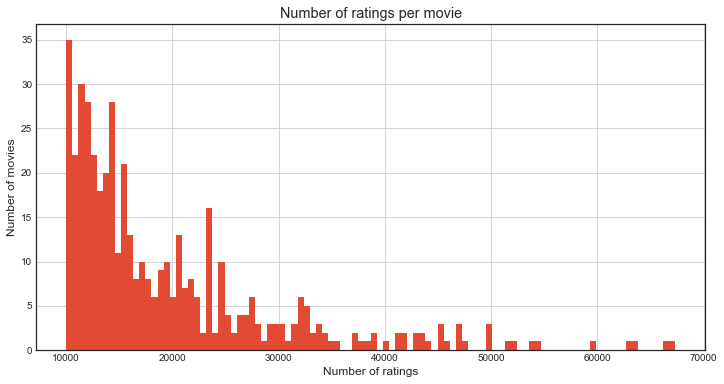

In [35]:
# the graph indicates that most of the movies have less than 40000 ratings
plt.figure(figsize=(12,6))
df_movies_ext[df_movies_ext['ratingCount'] > 10000]['ratingCount'].hist(bins=100)
plt.title('Number of ratings per movie')
plt.xlabel('Number of ratings')
plt.ylabel('Number of movies')

#### Movies distribution per year (> 1960)

Text(0,0.5,'Number of movies')

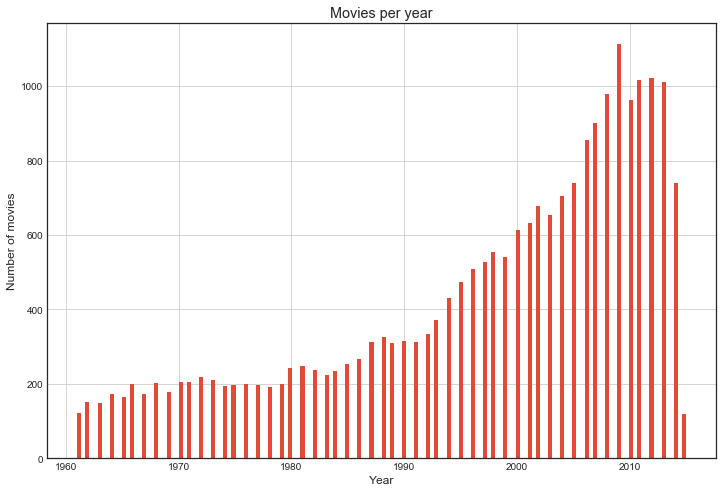

In [36]:
# most movies have been released after 1990
plt.figure(figsize=(12,8))
movies[movies['year'] > 1960]['year'].hist(bins=150)
plt.title('Movies per year')
plt.xlabel('Year')
plt.ylabel('Number of movies')

#### Users distribution per occupation

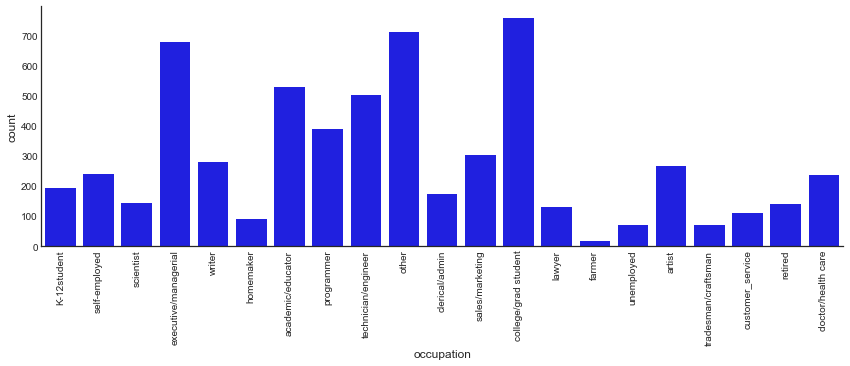

In [37]:
# most of the students are students
sns.factorplot("occupation", data=users, aspect=3, kind="count", color="b").set_xticklabels(rotation=90)

#### Ratings distribution per grade

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


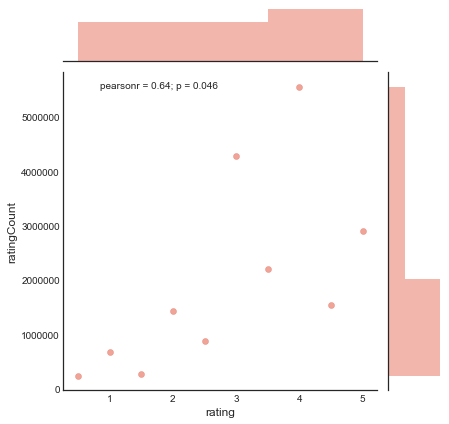

In [38]:
# most of the grades are equals or greater than 3
sns.jointplot(x='rating',y='ratingCount',data=df_rating_dist,alpha=0.5)

#### Relationship between number of ratings - ratings mean

d:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


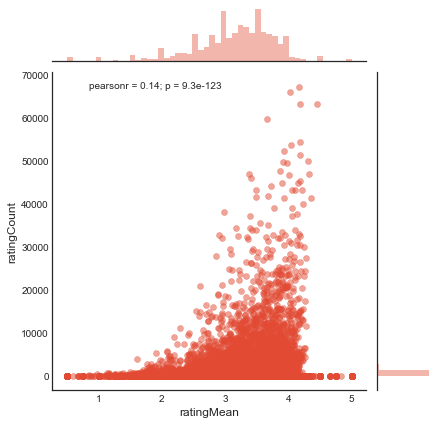

In [39]:
# the movies with the most ratings tend to have better rankings
sns.jointplot(x='ratingMean',y='ratingCount',data= df_movies_ext,alpha=0.5)

#### Ratings per user

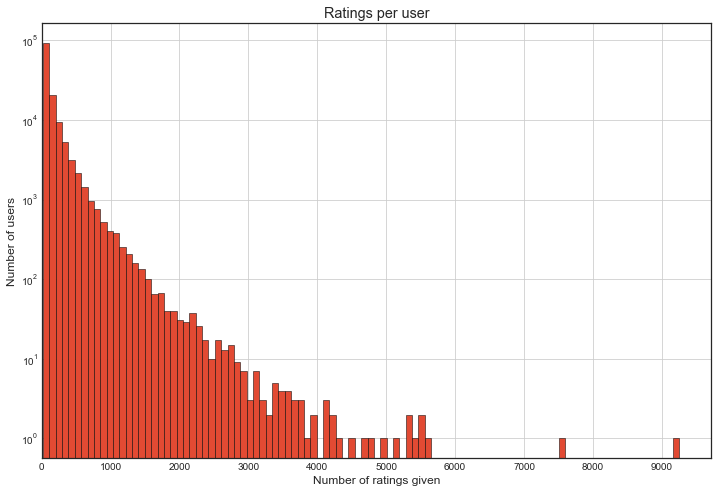

In [40]:
# most users have less than 4000 ratings
plt.figure(figsize=(12,8))
ratings_per_user['Total'].hist(bins=100, edgecolor='black', log=True)
plt.title('Ratings per user')
plt.xlabel('Number of ratings given')
plt.ylabel('Number of users')
plt.xlim(0,)
plt.xticks(np.arange(0,10000,1000))
plt.show()